03/17/2022



Min Cut Solution

We are minimizing the Hamiltonian $H= H_A + H_B = A\left( \sum_{n=1}^N s_i \right)^2 + B \sum_{(u,v) \in E} \frac{1-s_us_v}{2}$

where the first sum $H_A \to 0$ naturally for the minimum solution. 

In [ ]:
!pip install pyqubo
!pip install docplex
!pip install cplex

     |████████████████████████████████| 229 kB 30.8 MB/s 
     |████████████████████████████████| 497 kB 44.9 MB/s 
     |████████████████████████████████| 13.0 MB 38.0 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.7
    Uninstalling pyparsing-3.0.7:
      Successfully uninstalled pyparsing-3.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 610 kB 23.0 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=f802cc8c3d82abc98fc2611fe969a1eee32d1547089f238510cbd34222872ffd
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex
     |████████████████████████████████| 30.9 MB 36.3 MB/s 


In [ ]:
import numpy as np
import neal
import time
import docplex.mp.model as md
import networkx as nx
import matplotlib.pyplot as plt
import random
from scipy.spatial import Delaunay

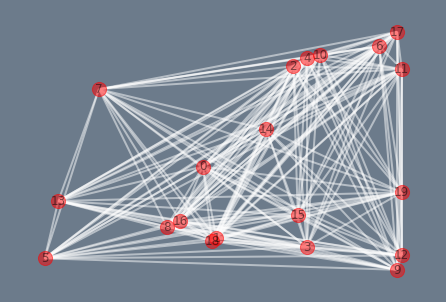

In [ ]:
number_of_points = 20
# Create Data
np.random.seed(0)
x_coord = np.random.randint(0,100,number_of_points)
np.random.seed(1)
y_coord = np.random.randint(0,100,number_of_points)
points=[]
for i in range(number_of_points):
    points.append((x_coord[i],y_coord[i]))
# Generate Graph With Nodes and Edges
G = nx.Graph()
for i in range(number_of_points): 
    G.add_node(i,pos=points[i])
edges=[]
for i in range(number_of_points):
  for j in range(i,number_of_points):
    if i!=j and (j,i) not in edges:
      edges.append((i,j))
    else:
      continue
#tri = Delaunay(points)
#edges=[]
#for i in range(len(tri.simplices)):
#    for j in range(3):
#        edges.append((tri.simplices[i][j],tri.simplices[i][j+1]) if j!=2 else (tri.simplices[i][j],tri.simplices[i][0]))
G.add_edges_from(edges)
fig = plt.figure()
nx.draw(G, pos=nx.get_node_attributes(G,'pos'), with_labels=True, alpha=0.5, node_color='red', edge_color='w',width=2.0,node_size=200)
fig.set_facecolor("#6C7B8B")

In [ ]:
start = time.time()
model=md.Model(name='integer_programming')
s=model.integer_var_list(number_of_points,lb=-1,ub=1,name='nodes')
model.add_constraints((s[i] != 0 for i in range(len(s))))
#model.add_constraint((np.sum(s)==0))
weights_docplex=[ np.sum(s)**2+(1-s[i]*s[j])/2 for i,j in G.edges()]
model.minimize(np.sum(weights_docplex))
si = model.solve(url=None,key=None)
a=model.solution.get_value_list(s)
a=np.array(a,dtype=int)
time_cplex=time.time()-start
 
print('Solution: ', a)
print('Total Time:' , time_cplex,'s')

Solution:  [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1]
Total Time: 3.3262104988098145 s


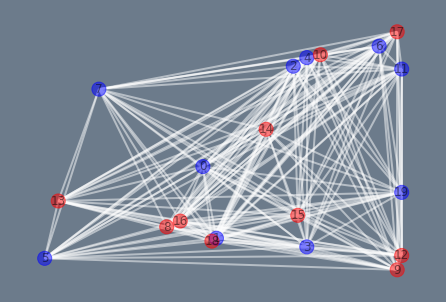

In [ ]:
# Plot Solution
# Generate Graph With Nodes and Edges
G2 = nx.Graph()
for i in range(number_of_points): 
    if a[i]==1:
        G2.add_node(i,pos=points[i],color='red')
    else:
        G2.add_node(i,pos=points[i],color='blue')
colors = [node[1]['color'] for node in G2.nodes(data=True)]
G2.add_edges_from(edges)
fig2 = plt.figure()
nx.draw(G2, pos=nx.get_node_attributes(G2,'pos'), with_labels=True, node_color=colors, edge_color='w', width=2.0,alpha=0.5, node_size=200)
fig2.set_facecolor("#6C7B8B")